In [12]:
import json
import numpy as np
import cv2
import base64
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

In [92]:
import os
from collections import Counter

# Directory containing images
image_directory = "/kaggle/input/opg-mask"

# Initialize Counter to count occurrences of each age
age_count = Counter()

# Loop through each file in the directory
for filename in os.listdir(image_directory):
    # Check if the filename follows the pattern age-gender-code.png
    if filename.endswith(".png"):
        # Extract age from the filename
        try:
            age = int(filename.split('-')[0])
            age_count[age] += 1
        except ValueError:
            # Skip files that don't match the pattern
            continue

total_img=0
# Display the number of images for each age
for age, count in sorted(age_count.items()):
    print(f"Age {age}: {count} images")
    total_img=total_img+count


print("Total Images: ",total_img)

Age 7: 8 images
Age 8: 13 images
Age 9: 9 images
Age 10: 13 images
Age 11: 15 images
Age 12: 24 images
Age 14: 38 images
Age 15: 18 images
Age 16: 23 images
Age 17: 29 images
Age 18: 16 images
Age 19: 4 images
Age 20: 7 images
Age 21: 8 images
Age 22: 12 images
Age 23: 12 images
Age 24: 16 images
Total Images:  265


### Image Utils

In [93]:
# Display function
def display_image(img, title="", cmap='gray'):
    plt.imshow(img, cmap=cmap)
    plt.title(title)
    plt.axis('off')
    plt.show()

In [94]:
# def visualize_masks(path):
#     image_path = path
#     mask_path = path.split(".")[0] + "_m3.json"
#     # Load JSON file
#     with open(mask_path) as f:
#         data = json.load(f)

#     # Define the path to the original image
#     original_image_path = image_path

#     # Load the original image
#     original_image = cv2.imread(original_image_path, cv2.IMREAD_GRAYSCALE)
#     image_height, image_width = original_image.shape[:2]

#     # Initialize a blank mask
#     combined_mask = np.zeros((image_height, image_width), dtype=np.uint8)

#     # Process each shape in the JSON data
#     for idx, shape in enumerate(data['shapes']):
#         # Get bounding box coordinates from the 'points' field
#         x_min = int(min([p[0] for p in shape['points']]))
#         x_max = int(max([p[0] for p in shape['points']]))
#         y_min = int(min([p[1] for p in shape['points']]))
#         y_max = int(max([p[1] for p in shape['points']]))

#         # Decode the base64 mask
#         mask_data = base64.b64decode(shape['mask'])
#         mask_image = Image.open(BytesIO(mask_data))

#         # Convert mask to numpy array
#         mask_np = np.array(mask_image)

#         # Resize the mask to the bounding box dimensions
#         mask_resized = cv2.resize(mask_np, (x_max - x_min, y_max - y_min), interpolation=cv2.INTER_NEAREST)

#         # Convert to binary mask
#         mask_binary = (mask_resized > 0).astype(np.uint8)

#         # Place the mask in the correct position on the combined mask
#         combined_mask[y_min:y_max, x_min:x_max] = np.maximum(combined_mask[y_min:y_max, x_min:x_max], mask_binary)

#     # Create a colored overlay by coloring the mask region in red (or another color)
#     colored_mask = np.zeros((image_height, image_width, 3), dtype=np.uint8)  # Initialize RGB overlay
#     colored_mask[:, :, 0] = combined_mask * 255  # Set the red channel where the mask is 1

#     # Convert the grayscale original image to RGB
#     original_image_rgb = cv2.cvtColor(original_image, cv2.COLOR_GRAY2RGB)

#     # Superimpose the mask on the original image by blending
#     superimposed_image = cv2.addWeighted(original_image_rgb, 0.7, colored_mask, 0.3, 0)

#     return original_image, combined_mask * 255, superimposed_image

In [95]:
# def visualize_masks(path):
#     image_path = path
#     mask_path = path.split(".")[0] + "_m3.json"
    
#     # Load JSON file
#     with open(mask_path) as f:
#         data = json.load(f)
    
#     # Define the path to the original image
#     original_image_path = image_path
    
#     # Load the original image
#     original_image = cv2.imread(original_image_path, cv2.IMREAD_GRAYSCALE)
#     image_height, image_width = original_image.shape[:2]
    
#     # Initialize a blank mask
#     combined_mask = np.zeros((image_height, image_width), dtype=np.uint8)
    
#     # Process the lower two masks with 'm3lr' and 'm3ll' suffixes
#     for idx, shape in enumerate(data['shapes']):
#         if shape['label'].endswith('m3lr') or shape['label'].endswith('m3ll'):
#             # Get bounding box coordinates from the 'points' field
#             x_min = int(min([p[0] for p in shape['points']]))
#             x_max = int(max([p[0] for p in shape['points']]))
#             y_min = int(min([p[1] for p in shape['points']]))
#             y_max = int(max([p[1] for p in shape['points']]))
            
#             # Decode the base64 mask
#             mask_data = base64.b64decode(shape['mask'])
#             mask_image = Image.open(BytesIO(mask_data))
            
#             # Convert mask to numpy array
#             mask_np = np.array(mask_image)
            
#             # Resize the mask to the bounding box dimensions
#             mask_resized = cv2.resize(mask_np, (x_max - x_min, y_max - y_min), interpolation=cv2.INTER_NEAREST)
            
#             # Convert to binary mask
#             mask_binary = (mask_resized > 0).astype(np.uint8)
            
#             # Place the mask in the correct position on the combined mask
#             combined_mask[y_min:y_max, x_min:x_max] = np.maximum(combined_mask[y_min:y_max, x_min:x_max], mask_binary)
    
#     # Create a colored overlay by coloring the mask region in red (or another color)
#     colored_mask = np.zeros((image_height, image_width, 3), dtype=np.uint8)  # Initialize RGB overlay
#     colored_mask[:, :, 0] = combined_mask * 255  # Set the red channel where the mask is 1
    
#     # Convert the grayscale original image to RGB
#     original_image_rgb = cv2.cvtColor(original_image, cv2.COLOR_GRAY2RGB)
    
#     # Superimpose the mask on the original image by blending
#     superimposed_image = cv2.addWeighted(original_image_rgb, 0.7, colored_mask, 0.3, 0)
    
#     return original_image, combined_mask * 255, superimposed_image

In [96]:
# def visualize_masks(path):
#     image_path = path
#     mask_path = path.split(".")[0] + "_m3.json"
    
#     # Load JSON file
#     with open(mask_path) as f:
#         data = json.load(f)
    
#     # Define the path to the original image
#     original_image_path = image_path
    
#     # Load the original image
#     original_image = cv2.imread(original_image_path, cv2.IMREAD_GRAYSCALE)
#     image_height, image_width = original_image.shape[:2]
    
#     # Initialize the four quadrant masks
#     m3ul_mask = np.zeros((image_height // 2, image_width // 2), dtype=np.uint8)
#     m3ur_mask = np.zeros((image_height // 2, image_width // 2), dtype=np.uint8)
#     m3ll_mask = np.zeros((image_height // 2, image_width // 2), dtype=np.uint8)
#     m3lr_mask = np.zeros((image_height // 2, image_width // 2), dtype=np.uint8)
    
#     # Process the four segmented masks
#     for idx, shape in enumerate(data['shapes']):
#         if shape['label'].endswith('m3ul'):
#             x_min = int(min([p[0] for p in shape['points']]))
#             x_max = int(max([p[0] for p in shape['points']]))
#             y_min = int(min([p[1] for p in shape['points']]))
#             y_max = int(max([p[1] for p in shape['points']]))
            
#             mask_data = base64.b64decode(shape['mask'])
#             mask_image = Image.open(BytesIO(mask_data))
#             mask_np = np.array(mask_image)
#             mask_resized = cv2.resize(mask_np, (image_width // 2, image_height // 2), interpolation=cv2.INTER_NEAREST)
#             mask_binary = (mask_resized > 0).astype(np.uint8)
#             m3ul_mask[:, :] = np.maximum(m3ul_mask, mask_binary)
#         # Process other masks (m3ur, m3ll, m3lr) in a similar manner
    
#     # Create a combined image with the four segmented masks
#     combined_image = np.zeros((image_height, image_width, 3), dtype=np.uint8)
#     combined_image[:image_height // 2, :image_width // 2, 0] = m3ul_mask * 255
#     combined_image[:image_height // 2, image_width // 2:, 0] = m3ur_mask * 255
#     combined_image[image_height // 2:, :image_width // 2, 0] = m3ll_mask * 255
#     combined_image[image_height // 2:, image_width // 2:, 0] = m3lr_mask * 255
    
#     # Convert the grayscale original image to RGB
#     original_image_rgb = cv2.cvtColor(original_image, cv2.COLOR_GRAY2RGB)
    
#     # Superimpose the combined mask on the original image by blending
#     superimposed_image = cv2.addWeighted(original_image_rgb, 0.7, combined_image, 0.3, 0)
    
#     return original_image, combined_image, superimposed_image

In [97]:
# def visualize_masks(path):
#     image_path = path
#     mask_path = path.split(".")[0] + "_m3.json"
    
#     # Load JSON file
#     with open(mask_path) as f:
#         data = json.load(f)
    
#     # Load the original image
#     original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
#     image_height, image_width = original_image.shape[:2]
    
#     # Calculate quadrant dimensions, accounting for odd dimensions
#     half_height = image_height // 2
#     half_width = image_width // 2
    
#     # Calculate the bottom half height (accounts for odd dimensions)
#     bottom_height = image_height - half_height
#     right_width = image_width - half_width
    
#     # Initialize the four quadrant masks with correct dimensions
#     m3ul_mask = np.zeros((half_height, half_width), dtype=np.uint8)
#     m3ur_mask = np.zeros((half_height, right_width), dtype=np.uint8)
#     m3ll_mask = np.zeros((bottom_height, half_width), dtype=np.uint8)
#     m3lr_mask = np.zeros((bottom_height, right_width), dtype=np.uint8)
    
#     # Initialize quadrant images with correct dimensions
#     quadrant_images = {
#         'm3ul': np.zeros((half_height, half_width), dtype=np.uint8),
#         'm3ur': np.zeros((half_height, right_width), dtype=np.uint8),
#         'm3ll': np.zeros((bottom_height, half_width), dtype=np.uint8),
#         'm3lr': np.zeros((bottom_height, right_width), dtype=np.uint8)
#     }
    
#     # Process the four segmented masks and crop original image
#     for shape in data['shapes']:
#         # Extract label
#         label = shape['label']
#         if not any(label.endswith(suffix) for suffix in ['m3ul', 'm3ur', 'm3ll', 'm3lr']):
#             continue
            
#         # Get bounding box coordinates
#         x_min = int(min([p[0] for p in shape['points']]))
#         x_max = int(max([p[0] for p in shape['points']]))
#         y_min = int(min([p[1] for p in shape['points']]))
#         y_max = int(max([p[1] for p in shape['points']]))
        
#         # Crop the original image using bounding box
#         cropped_image = original_image[y_min:y_max, x_min:x_max]
        
#         # Resize cropped image based on quadrant
#         if label.endswith('m3ul'):
#             target_size = (half_width, half_height)
#         elif label.endswith('m3ur'):
#             target_size = (right_width, half_height)
#         elif label.endswith('m3ll'):
#             target_size = (half_width, bottom_height)
#         else:  # m3lr
#             target_size = (right_width, bottom_height)
            
#         resized_crop = cv2.resize(cropped_image, target_size)
        
#         # Process mask
#         mask_data = base64.b64decode(shape['mask'])
#         mask_image = Image.open(BytesIO(mask_data))
#         mask_np = np.array(mask_image)
#         mask_resized = cv2.resize(mask_np, target_size, interpolation=cv2.INTER_NEAREST)
#         mask_binary = (mask_resized > 0).astype(np.uint8)
        
#         # Place cropped image and mask in appropriate quadrant
#         if label.endswith('m3ul'):
#             quadrant_images['m3ul'] = resized_crop
#             m3ul_mask = np.maximum(m3ul_mask, mask_binary)
#         elif label.endswith('m3ur'):
#             quadrant_images['m3ur'] = resized_crop
#             m3ur_mask = np.maximum(m3ur_mask, mask_binary)
#         elif label.endswith('m3ll'):
#             quadrant_images['m3ll'] = resized_crop
#             m3ll_mask = np.maximum(m3ll_mask, mask_binary)
#         elif label.endswith('m3lr'):
#             quadrant_images['m3lr'] = resized_crop
#             m3lr_mask = np.maximum(m3lr_mask, mask_binary)
    
#     # Create combined image with cropped quadrants
#     combined_original = np.zeros((image_height, image_width), dtype=np.uint8)
#     combined_original[:half_height, :half_width] = quadrant_images['m3ur']
#     combined_original[:half_height, half_width:] = quadrant_images['m3ul']
#     combined_original[half_height:, :half_width] = quadrant_images['m3lr']
#     combined_original[half_height:, half_width:] = quadrant_images['m3ll']
    
#     # Create combined mask image
#     combined_mask = np.zeros((image_height, image_width, 3), dtype=np.uint8)
#     combined_mask[:half_height, :half_width, 0] = m3ul_mask * 255
#     combined_mask[:half_height, half_width:, 0] = m3ur_mask * 255
#     combined_mask[half_height:, :half_width, 0] = m3ll_mask * 255
#     combined_mask[half_height:, half_width:, 0] = m3lr_mask * 255
    
#     # Convert the combined original to RGB for final overlay
#     combined_original_rgb = cv2.cvtColor(combined_original, cv2.COLOR_GRAY2RGB)
    
#     # Create final superimposed image
#     superimposed_image = cv2.addWeighted(combined_original_rgb, 0.7, combined_mask, 0.3, 0)
    
#     return combined_original, combined_mask, superimposed_image

In [98]:
# def visualize_masks(path):
#     image_path = path
#     mask_path = path.split(".")[0] + "_m3.json"
    
#     # Load JSON file
#     with open(mask_path) as f:
#         data = json.load(f)
    
#     # Load the original image
#     original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
#     image_height, image_width = original_image.shape[:2]
    
#     # Calculate target dimensions (80% of original)
#     target_height = int(image_height * 0.8)
#     target_width = int(image_width * 0.8)
    
#     # Process only m3ll mask
#     for shape in data['shapes']:
#         # Extract label
#         label = shape['label']
#         if not label.endswith('m3ll'):
#             continue
            
#         # Get bounding box coordinates
#         x_min = int(min([p[0] for p in shape['points']]))
#         x_max = int(max([p[0] for p in shape['points']]))
#         y_min = int(min([p[1] for p in shape['points']]))
#         y_max = int(max([p[1] for p in shape['points']]))
        
#         # Crop the original image using bounding box
#         cropped_image = original_image[y_min:y_max, x_min:x_max]
        
#         # Image enhancement steps
#         # 1. Apply adaptive histogram equalization to improve contrast
#         clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
#         enhanced = clahe.apply(cropped_image)
        
#         # 2. Apply slight Gaussian blur to reduce noise while preserving edges
#         denoised = cv2.GaussianBlur(enhanced, (3,3), 0)
        
#         # 3. Apply unsharp masking to sharpen edges
#         gaussian_3 = cv2.GaussianBlur(denoised, (9,9), 2.0)
#         unsharp_image = cv2.addWeighted(denoised, 1.5, gaussian_3, -0.5, 0)
        
#         # 4. Normalize the image
#         normalized = cv2.normalize(unsharp_image, None, 0, 255, cv2.NORM_MINMAX)
        
#         # Calculate mean value of the processed image to use for background
#         mean_value = int(np.mean(normalized))
        
#         # Initialize output image with mean value instead of black
#         output_image = np.full((image_height, image_width), mean_value, dtype=np.uint8)
        
#         # Resize enhanced image to target size (80% of original)
#         resized_crop = cv2.resize(normalized, (target_width, target_height))
        
#         # Calculate positioning for centering
#         start_y = (image_height - target_height) // 2
#         start_x = (image_width - target_width) // 2
        
#         # Create a smooth transition between image and background
#         # Create a larger Gaussian kernel for smoother blending
#         kernel_size = 21
#         blur_kernel = cv2.getGaussianKernel(kernel_size, 5)
#         blur_kernel_2d = blur_kernel @ blur_kernel.T
        
#         # Create a mask for blending
#         mask = np.ones_like(resized_crop, dtype=np.float32)
#         mask = cv2.GaussianBlur(mask, (kernel_size, kernel_size), 5)
        
#         # Blend the image with background
#         output_image[start_y:start_y + target_height, start_x:start_x + target_width] = \
#             (resized_crop * mask + mean_value * (1 - mask)).astype(np.uint8)
        
#         break
    
#     return output_image

In [99]:
import json
import cv2
import numpy as np

def visualize_masks(path):
    image_path = path
    mask_path = path.split(".")[0] + "_m3.json"
    
    # Load JSON file
    try:
        with open(mask_path) as f:
            data = json.load(f)
    except FileNotFoundError:
        print("Mask file not found.")
        return np.full((500, 500), 127, dtype=np.uint8)  # Return a default gray image
    
    # Load the original image
    original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if original_image is None:
        print("Image file not found.")
        return np.full((500, 500), 127, dtype=np.uint8)  # Return a default gray image

    image_height, image_width = original_image.shape[:2]
    
    # Calculate target dimensions (80% of original)
    target_height = int(image_height * 0.8)
    target_width = int(image_width * 0.8)
    
    # Initialize default gray image for output
    output_image = np.full((image_height, image_width), 127, dtype=np.uint8)
    mask_found = False

    # Process only 'm3ll' mask
    for shape in data.get('shapes', []):
        label = shape.get('label', '')
        if not label.endswith('m3ll'):
            continue
            
        mask_found = True  # Indicate that we found a matching mask
        
        # Get bounding box coordinates
        x_min = int(min([p[0] for p in shape['points']]))
        x_max = int(max([p[0] for p in shape['points']]))
        y_min = int(min([p[1] for p in shape['points']]))
        y_max = int(max([p[1] for p in shape['points']]))
        
        # Crop the original image using bounding box
        cropped_image = original_image[y_min:y_max, x_min:x_max]
        
        # Image enhancement steps
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
        enhanced = clahe.apply(cropped_image)
        
        denoised = cv2.GaussianBlur(enhanced, (3,3), 0)
        
        gaussian_3 = cv2.GaussianBlur(denoised, (9,9), 2.0)
        unsharp_image = cv2.addWeighted(denoised, 1.5, gaussian_3, -0.5, 0)
        
        normalized = cv2.normalize(unsharp_image, None, 0, 255, cv2.NORM_MINMAX)
        
        mean_value = int(np.mean(normalized))
        
        output_image = np.full((image_height, image_width), mean_value, dtype=np.uint8)
        
        resized_crop = cv2.resize(normalized, (target_width, target_height))
        
        start_y = (image_height - target_height) // 2
        start_x = (image_width - target_width) // 2
        
        kernel_size = 21
        blur_kernel = cv2.getGaussianKernel(kernel_size, 5)
        blur_kernel_2d = blur_kernel @ blur_kernel.T
        
        mask = np.ones_like(resized_crop, dtype=np.float32)
        mask = cv2.GaussianBlur(mask, (kernel_size, kernel_size), 5)
        
        output_image[start_y:start_y + target_height, start_x:start_x + target_width] = \
            (resized_crop * mask + mean_value * (1 - mask)).astype(np.uint8)
        
        break
    
    # If no mask is found, return the default gray image
    if not mask_found:
        output_image = np.full((image_height, image_width), 127, dtype=np.uint8)
    
    return output_image

In [100]:
combined_original = visualize_masks('/kaggle/input/opg-mask/11-f-2.png')

In [101]:
# def visualize_masked_region_direct(original, mask):
#     # Ensure the mask is binary (only values 0 and 255)
#     _, binary_mask = cv2.threshold(mask, 127, 255, cv2.THRESH_BINARY)
#     # Apply the binary mask to the original image
#     masked_image = cv2.bitwise_and(original, original, mask=binary_mask)
#     return masked_image

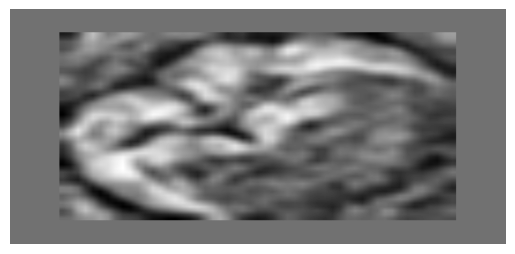

In [102]:
# masked_image = visualize_masked_region_direct(original, mask)
display_image(combined_original)

In [103]:
!rm -rf /kaggle/working/*

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


### Preparing Dataset

In [104]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Directory containing images
image_directory = "/kaggle/input/opg-mask"
output_directory = "/kaggle/working/CategorizedImages"

age_ranges = {
    (7, 10): "Age_7-10",
    (11, 14): "Age_11-14",
    (15, 18): "Age_15-18",
    (19, 24): "Age_19-24"
}

# Create the output directory if it doesn't exist
os.makedirs(output_directory, exist_ok=True)

# Create subdirectories for each age range within the output directory
for folder in age_ranges.values():
    os.makedirs(os.path.join(output_directory, folder), exist_ok=True)

# Loop through each file in the original image directory
for filename in os.listdir(image_directory):
    # Extract age from the filename
    try:
        age = int(filename.split('-')[0])

        # Determine the correct folder based on the age
        for age_range, folder in age_ranges.items():
            if age_range[0] <= age <= age_range[1]:
                # Copy the file to the appropriate folder in the output directory
                source_path = os.path.join(image_directory, filename)
                destination_path = os.path.join(output_directory, folder, filename)
                shutil.copy(source_path, destination_path)
                break
    except ValueError:
        # Skip files that don't match the pattern
        continue

In [105]:
def save_masked_images(path: str):
    # Get the base directory and folder name
    base_dir = "/kaggle/working"
    folder_name = os.path.basename(path)

    # Create the new folder path
    new_folder_path = os.path.join(base_dir, "refined_images", folder_name)
    os.makedirs(new_folder_path, exist_ok=True)

    # Process each image in the folder
    for filename in os.listdir(path):
        if filename.endswith(".png"):
            image_path = os.path.join(path, filename)
            mask_path = os.path.join(path, filename.split(".")[0] + "_m3.json")

            # Check if the mask file exists
            if os.path.exists(mask_path):
                ## Visualize the masks
                # original, mask, superimposed = visualize_masks(image_path)
                ## Save the masked image
                # masked_image = visualize_masked_region_direct(original, mask)
                lower_left = visualize_masks(image_path)
                new_image_path = os.path.join(new_folder_path, filename)
                cv2.imwrite(new_image_path, lower_left)
            else:
                print(f"Mask file not found for {filename}. Skipping.")

In [106]:
for age_range, directory in age_ranges.items():
    save_masked_images(f"/kaggle/working/CategorizedImages/{directory}")

libpng warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
libpng warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


In [107]:
!rm -rf /kaggle/working/CategorizedImages

### Data Split

In [108]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Define paths
original_dataset_dir = '/kaggle/working/refined_images'
train_dir = '/kaggle/working/train_test_val/train'
val_dir = '/kaggle/working/train_test_val/val'

# Create train and validation directories
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

# Loop through each class subdirectory in the original dataset
for class_name in os.listdir(original_dataset_dir):
    class_dir = os.path.join(original_dataset_dir, class_name)
    if os.path.isdir(class_dir):
        # Create class subdirectories in train and val directories
        train_class_dir = os.path.join(train_dir, class_name)
        val_class_dir = os.path.join(val_dir, class_name)
        os.makedirs(train_class_dir, exist_ok=True)
        os.makedirs(val_class_dir, exist_ok=True)
        
        # List all images in the current class directory
        images = [f for f in os.listdir(class_dir) if f.endswith(('.png', '.jpg', '.jpeg'))]
        
        # First split into train (70%) and temp (30%)
        train_images, val_images = train_test_split(images, test_size=0.3, random_state=42)
        
        # Copy images to their respective directories
        for img_name in train_images:
            shutil.copy(os.path.join(class_dir, img_name), os.path.join(train_class_dir, img_name))
        
        for img_name in val_images:
            shutil.copy(os.path.join(class_dir, img_name), os.path.join(val_class_dir, img_name))
        
print("Data split completed.")
shutil.rmtree(original_dataset_dir)

Data split completed.


# Augmentation

In [109]:
# Define paths
train_dataset_dir = '/kaggle/working/train_test_val/train'  # Path to training dataset
augmented_train_dir = '/kaggle/working/augmented_images/augmented_train'  # Path to save augmented training dataset

val_dataset_dir = '/kaggle/working/train_test_val/val'
augmented_val_dir = '/kaggle/working/augmented_images/augmented_val'

# Ensure the output directory exists
os.makedirs(augmented_train_dir, exist_ok=True)
os.makedirs(augmented_val_dir, exist_ok=True)

In [31]:
!pip install -q -U albumentations

In [110]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import img_to_array, load_img, ImageDataGenerator
import albumentations as A
import cv2

In [111]:
# class OPGAugmentationPipeline:
#     def __init__(self, intensity=0.5):
#         """
#         Initialize the OPG augmentation pipeline specifically for dental X-rays.
        
#         Args:
#             intensity (float): Controls the strength of augmentations (0.0 to 1.0)
#         """
#         self.intensity = intensity
#         self.setup_keras_pipeline()
#         self.setup_albumentations_pipeline()
        
#     def setup_keras_pipeline(self):
#         # Increased geometric transformations
#         self.keras_datagen = ImageDataGenerator(
#             width_shift_range=0.05 * self.intensity,
#             height_shift_range=0.05 * self.intensity,
#             rotation_range=5 * self.intensity,
#             zoom_range=0.1 * self.intensity,
#             fill_mode='constant',
#             cval=0,
#             horizontal_flip=False,
#             vertical_flip=False
#         )
        
#     def setup_albumentations_pipeline(self):
#         # More diverse augmentations with higher probabilities
#         self.albumentations_pipeline = A.Compose([
#             # Enhanced contrast and brightness variations
#             A.OneOf([
#                 A.RandomBrightnessContrast(
#                     brightness_limit=0.2 * self.intensity,
#                     contrast_limit=0.2 * self.intensity,
#                     always_apply=False,
#                     p=0.8
#                 ),
#                 A.RandomGamma(
#                     gamma_limit=(80, 120),
#                     p=0.7
#                 ),
#                 A.CLAHE(
#                     clip_limit=2.0,
#                     tile_grid_size=(8, 8),
#                     p=0.5
#                 )
#             ], p=0.9),
            
#             # Enhanced texture variations
#             A.OneOf([
#                 A.GaussNoise(
#                     var_limit=(5.0 * self.intensity, 15.0 * self.intensity),
#                     mean=0,
#                     per_channel=False,
#                     p=0.6
#                 ),
#                 A.MultiplicativeNoise(
#                     multiplier=(0.9, 1.1),
#                     per_channel=False,
#                     p=0.4
#                 ),
#                 A.GaussianBlur(
#                     blur_limit=(3, 5),
#                     sigma_limit=(0.2, 0.5),
#                     p=0.4
#                 )
#             ], p=0.7),
            
#             # Modified geometric transformations
#             A.OneOf([
#                 A.ShiftScaleRotate(
#                     shift_limit=0.1 * self.intensity,
#                     scale_limit=0.1 * self.intensity,
#                     rotate_limit=10 * self.intensity,
#                     p=0.7
#                 ),
#                 A.GridDistortion(
#                     distort_limit=0.2 * self.intensity,
#                     p=0.3
#                 ),
#                 A.OpticalDistortion(
#                     distort_limit=0.2 * self.intensity,
#                     shift_limit=0.1 * self.intensity,
#                     p=0.3
#                 )
#             ], p=0.5),
            
#             # Modified grid dropout
#             A.GridDropout(
#                 ratio=0.005 * self.intensity,
#                 holes_number_x=3,
#                 holes_number_y=3,
#                 random_offset=True,
#                 fill_value=0,
#                 p=0.2
#             )
#         ])

#     def __call__(self, image):
#         """
#         Apply augmentations to the input OPG image.
        
#         Args:
#             image: Input OPG image (expected to be grayscale)
            
#         Returns:
#             Augmented image preserving medical diagnostic quality
#         """
#         # Ensure proper image type and range
#         if image.dtype != np.uint8:
#             image = (image * 255).astype(np.uint8)
            
#         # Store original range
#         original_min = float(image.min())
#         original_max = float(image.max())
        
#         # Ensure image is grayscale and has channel dimension
#         if len(image.shape) == 3 and image.shape[-1] == 3:
#             image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
#         if len(image.shape) == 2:
#             image = np.expand_dims(image, axis=-1)
            
#         # Apply geometric transformations first
#         augmented = self.keras_datagen.random_transform(image)
        
#         # Apply intensity and texture transformations
#         augmented = self.albumentations_pipeline(image=augmented)['image']
        
#         # Ensure output is in proper range
#         augmented = np.clip(augmented, 0, 255)
        
#         # Restore original intensity range while preserving local contrast
#         if original_min != original_max:
#             augmented = ((augmented - augmented.min()) * 
#                         (original_max - original_min) / 
#                         (augmented.max() - augmented.min() + 1e-7) + 
#                         original_min)
        
#         # Ensure output has channel dimension
#         if len(augmented.shape) == 2:
#             augmented = np.expand_dims(augmented, axis=-1)
            
#         return augmented.astype(np.uint8)

#     def process_batch(self, images):
#         """
#         Process a batch of images through the augmentation pipeline.
        
#         Args:
#             images: Batch of grayscale images (N, H, W) or (N, H, W, 1)
            
#         Returns:
#             Batch of augmented images (N, H, W, 1)
#         """
#         # Ensure proper shape
#         if len(images.shape) == 3:
#             images = np.expand_dims(images, axis=-1)
            
#         return np.stack([self.__call__(img) for img in images])

In [112]:
class OPGAugmentationPipeline:
    """
    Applies a set of augmentations specifically designed for dental OPG (Orthopantomogram) images.

    The pipeline combines transformations from Keras' ImageDataGenerator and the Albumentations library to
    enhance the diversity of the training data while preserving the medical diagnostic quality of the images.

    The key goals of this pipeline are:
    1. Increase the robustness of deep learning models to common variations in dental OPG images.
    2. Introduce controlled distortions and texture changes to improve model generalization.
    3. Maintain the overall structure and anatomical integrity of the OPG images.

    Args:
        intensity (float): Controls the strength of augmentations (0.0 to 1.0). Higher values will apply more
            aggressive transformations.
    """
    def __init__(self, intensity=0.5):
        self.intensity = intensity
        self.setup_keras_pipeline()
        self.setup_albumentations_pipeline()

    def setup_keras_pipeline(self):
        """
        Configures the Keras ImageDataGenerator with moderate geometric transformations.

        The transformations include limited width/height shifts, rotation, and zoom. These are kept relatively
        mild to preserve the overall structure of the OPG images.
        """
        self.keras_datagen = ImageDataGenerator(
            width_shift_range=0.07 * self.intensity,
            height_shift_range=0.07 * self.intensity,
            rotation_range=5 * self.intensity,
            zoom_range=0.12 * self.intensity,
            fill_mode='constant',
            cval=127,
            horizontal_flip=False,
            vertical_flip=False
        )

    def setup_albumentations_pipeline(self):
        """
        Configures the Albumentations pipeline with more diverse and stronger augmentations.

        The transformations include enhanced contrast and brightness variations, texture modifications
        (noise, blurring), and additional geometric distortions. The probabilities and intensities of these
        transformations are controlled by the `intensity` parameter.
        """
        self.albumentations_pipeline = A.Compose([
            # Enhanced contrast and brightness variations
            A.OneOf([
                A.RandomBrightnessContrast(
                    brightness_limit=0.3 * self.intensity,
                    contrast_limit=0.3 * self.intensity,
                    always_apply=False,
                    p=0.8
                ),
                A.RandomGamma(
                    gamma_limit=(80, 120),
                    p=0.7
                ),
                A.CLAHE(
                    clip_limit=2.5,
                    tile_grid_size=(8, 8),
                    p=0.5
                )
            ], p=0.9),

            # Enhanced texture variations
            A.OneOf([
                A.GaussNoise(
                    var_limit=(10.0 * self.intensity, 30.0 * self.intensity),
                    mean=0,
                    per_channel=False,
                    p=0.6
                ),
                A.MultiplicativeNoise(
                    multiplier=(0.9, 1.1),
                    per_channel=False,
                    p=0.4
                ),
                A.GaussianBlur(
                    blur_limit=(3, 5),
                    sigma_limit=(0.2, 0.6),
                    p=0.4
                )
            ], p=0.7),

            # Modified geometric transformations
            A.OneOf([
                A.ShiftScaleRotate(
                    shift_limit=0.15 * self.intensity,
                    scale_limit=0.15 * self.intensity,
                    rotate_limit=15 * self.intensity,
                    p=0.7
                ),
                A.GridDistortion(
                    distort_limit=0.3 * self.intensity,
                    p=0.3
                ),
                A.OpticalDistortion(
                    distort_limit=0.3 * self.intensity,
                    shift_limit=0.15 * self.intensity,
                    p=0.3
                )
            ], p=0.5),

            # Modified grid dropout
            A.GridDropout(
                ratio=0.01 * self.intensity,
                holes_number_x=4,
                holes_number_y=4,
                random_offset=True,
                fill_value=0,
                p=0.2
            ),

            # Elastic deformations
            A.ElasticTransform(
                alpha=120 * self.intensity,
                sigma=120 * self.intensity,
                interpolation=cv2.INTER_LINEAR,
                border_mode=cv2.BORDER_REFLECT_101,
                p=0.3
            )
        ])

    def __call__(self, image):
        """
        Apply augmentations to the input OPG image.

        Args:
            image (numpy.ndarray): Input OPG image (expected to be grayscale)

        Returns:
            numpy.ndarray: Augmented image preserving medical diagnostic quality
        """
        # Ensure proper image type and range
        if image.dtype != np.uint8:
            image = (image * 255).astype(np.uint8)

        # Store original range
        original_min = float(image.min())
        original_max = float(image.max())

        # Ensure image is grayscale and has channel dimension
        if len(image.shape) == 3 and image.shape[-1] == 3:
            image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
        if len(image.shape) == 2:
            image = np.expand_dims(image, axis=-1)

        # Apply geometric transformations first
        augmented = self.keras_datagen.random_transform(image)

        # Apply intensity and texture transformations
        augmented = self.albumentations_pipeline(image=augmented)['image']

        # Ensure output is in proper range
        augmented = np.clip(augmented, 0, 255)

        # Restore original intensity range while preserving local contrast
        if original_min != original_max:
            augmented = ((augmented - augmented.min()) *
                         (original_max - original_min) /
                         (augmented.max() - augmented.min() + 1e-7) +
                         original_min)

        # Ensure output has channel dimension
        if len(augmented.shape) == 2:
            augmented = np.expand_dims(augmented, axis=-1)

        return augmented.astype(np.uint8)

    def process_batch(self, images):
        """
        Process a batch of images through the augmentation pipeline.

        Args:
            images (numpy.ndarray): Batch of grayscale images (N, H, W) or (N, H, W, 1)

        Returns:
            numpy.ndarray: Batch of augmented images (N, H, W, 1)
        """
        # Ensure proper shape
        if len(images.shape) == 3:
            images = np.expand_dims(images, axis=-1)

        return np.stack([self.__call__(img) for img in images])

In [113]:
def balance_dataset(train_dataset_dir, augmented_train_dataset_dir, target_size=500, intensity=0.3):
    """
    Balances the dataset by generating augmented images until each class reaches the target size.
    
    Args:
        train_dataset_dir (str): Directory with the original training dataset
        augmented_train_dataset_dir (str): Directory to save augmented dataset
        target_size (int): Target image count per class
        intensity (float): Controls the strength of augmentations
    """
    # Initialize augmenter with medical-appropriate settings
    augmenter = OPGAugmentationPipeline(intensity=0.5)
    
    # Create output directory
    os.makedirs(augmented_train_dataset_dir, exist_ok=True)
    
    # Process each class
    for class_name in os.listdir(train_dataset_dir):
        class_path = os.path.join(train_dataset_dir, class_name)
        augmented_class_path = os.path.join(augmented_train_dataset_dir, class_name)
        
        if not os.path.isdir(class_path):
            continue
            
        # Reset augmented class directory
        if os.path.exists(augmented_class_path):
            shutil.rmtree(augmented_class_path)
        os.makedirs(augmented_class_path)
        
        # Get list of original images
        images = [f for f in os.listdir(class_path) 
                 if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
        current_count = len(images)
        
        print(f"\nProcessing {class_name}:")
        print(f"Original count = {current_count}, Target = {target_size}")
        
        # Copy original images
        for img_name in images:
            original_img_path = os.path.join(class_path, img_name)
            shutil.copy(original_img_path, os.path.join(augmented_class_path, img_name))
        
        # Generate augmentations if needed
        if current_count < target_size:
            augmentations_needed = target_size - current_count
            print(f"Generating {augmentations_needed} augmented images...")
            
            for aug_count in range(augmentations_needed):
                # Select an original image to augment
                img_name = images[aug_count % current_count]
                img_path = os.path.join(class_path, img_name)
                
                # Read and augment image
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                aug_img = augmenter(img.copy())
                
                # Save augmented image
                aug_img_name = f"{os.path.splitext(img_name)[0]}_aug_{aug_count+1}.png"
                aug_img_path = os.path.join(augmented_class_path, aug_img_name)
                cv2.imwrite(aug_img_path, aug_img)
                
                # Print progress
                if (aug_count + 1) % 50 == 0:
                    print(f"Generated {aug_count + 1}/{augmentations_needed} augmentations")
    
    # Print final statistics
    print("\nFinal class counts:")
    for class_name in os.listdir(augmented_train_dataset_dir):
        class_path = os.path.join(augmented_train_dataset_dir, class_name)
        if os.path.isdir(class_path):
            count = len([f for f in os.listdir(class_path) 
                        if f.lower().endswith(('.png', '.jpg', '.jpeg'))])
            print(f"{class_name}: {count} images")

In [114]:
# def augment_dataset(train_dataset_dir, augmented_train_dataset_dir, augmentations_per_image=5, intensity=0.3):
#     """
#     Generates a specified number of augmented versions for each image in the dataset.
    
#     Args:
#         train_dataset_dir (str): Directory with the original training dataset
#         augmented_train_dataset_dir (str): Directory to save augmented dataset
#         augmentations_per_image (int): Number of augmented versions to generate for each image
#         intensity (float): Controls the strength of augmentations
#     """
#     # Initialize augmenter with medical-appropriate settings
#     augmenter = OPGAugmentationPipeline(intensity)
    
#     # Create output directory
#     os.makedirs(augmented_train_dataset_dir, exist_ok=True)
    
#     # Process each class
#     for class_name in os.listdir(train_dataset_dir):
#         class_path = os.path.join(train_dataset_dir, class_name)
#         augmented_class_path = os.path.join(augmented_train_dataset_dir, class_name)
        
#         if not os.path.isdir(class_path):
#             continue
            
#         # Reset augmented class directory
#         if os.path.exists(augmented_class_path):
#             shutil.rmtree(augmented_class_path)
#         os.makedirs(augmented_class_path)
        
#         # Get list of original images
#         images = [f for f in os.listdir(class_path) 
#                  if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
#         original_count = len(images)
        
#         print(f"\nProcessing {class_name}:")
#         print(f"Original count = {original_count}")
#         print(f"Will generate {augmentations_per_image} augmented versions per image")
#         total_augmentations = original_count * augmentations_per_image
        
#         # Copy original images
#         for img_name in images:
#             original_img_path = os.path.join(class_path, img_name)
#             shutil.copy(original_img_path, os.path.join(augmented_class_path, img_name))
        
#         # Generate augmentations for each image
#         processed_count = 0
#         for img_name in images:
#             img_path = os.path.join(class_path, img_name)
#             base_name = os.path.splitext(img_name)[0]
            
#             # Read original image
#             img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            
#             # Generate specified number of augmentations for this image
#             for aug_idx in range(augmentations_per_image):
#                 # Create augmented version
#                 aug_img = augmenter(img.copy())
                
#                 # Save augmented image
#                 aug_img_name = f"{base_name}_aug_{aug_idx+1}.png"
#                 aug_img_path = os.path.join(augmented_class_path, aug_img_name)
#                 cv2.imwrite(aug_img_path, aug_img)
                
#                 processed_count += 1
                
#                 # Print progress every 50 augmentations
#                 if processed_count % 50 == 0:
#                     print(f"Generated {processed_count}/{total_augmentations} total augmentations")
    
#     # Print final statistics
#     print("\nFinal class counts:")
#     for class_name in os.listdir(augmented_train_dataset_dir):
#         class_path = os.path.join(augmented_train_dataset_dir, class_name)
#         if os.path.isdir(class_path):
#             original_count = len([f for f in os.listdir(os.path.join(train_dataset_dir, class_name)) 
#                                 if f.lower().endswith(('.png', '.jpg', '.jpeg'))])
#             augmented_count = len([f for f in os.listdir(class_path) 
#                                  if f.lower().endswith(('.png', '.jpg', '.jpeg'))]) - original_count
#             total_count = original_count + augmented_count
            
#             print(f"{class_name}: {total_count} images (Original: {original_count} + Augmented: {augmented_count})")

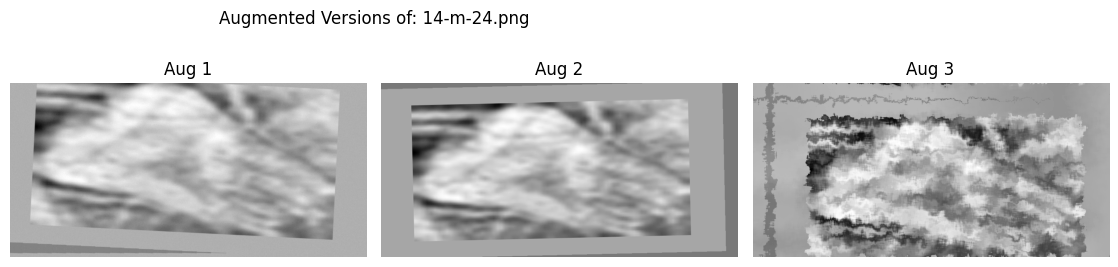

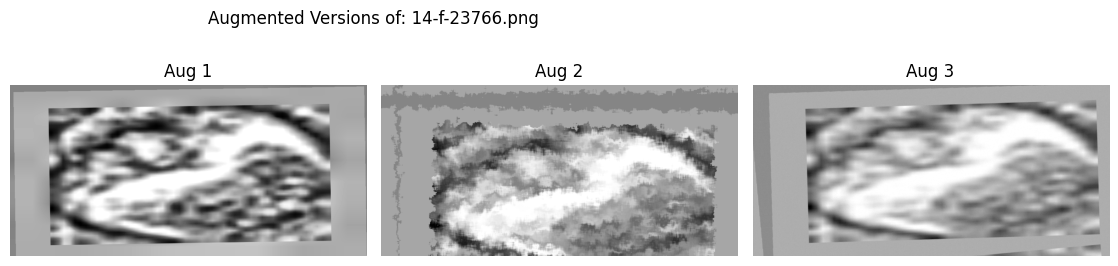

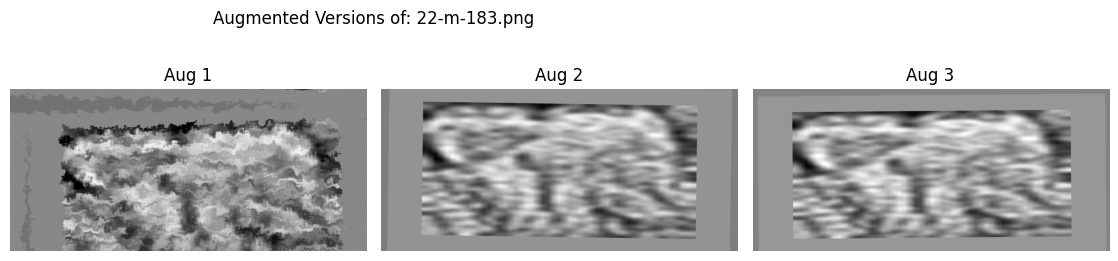

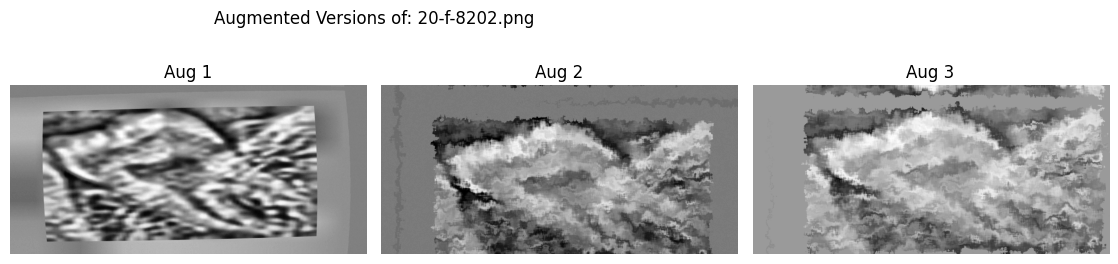

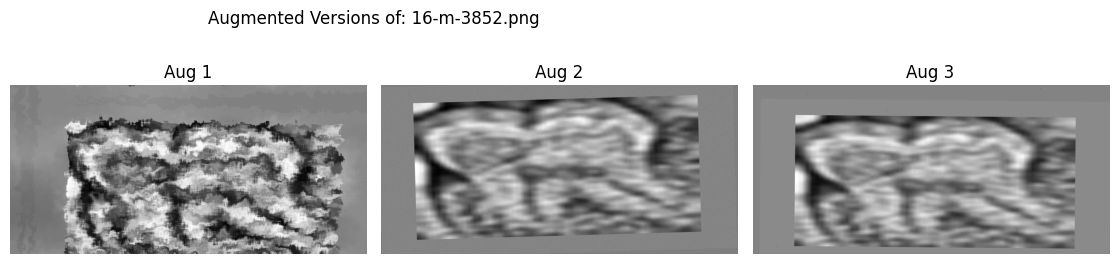

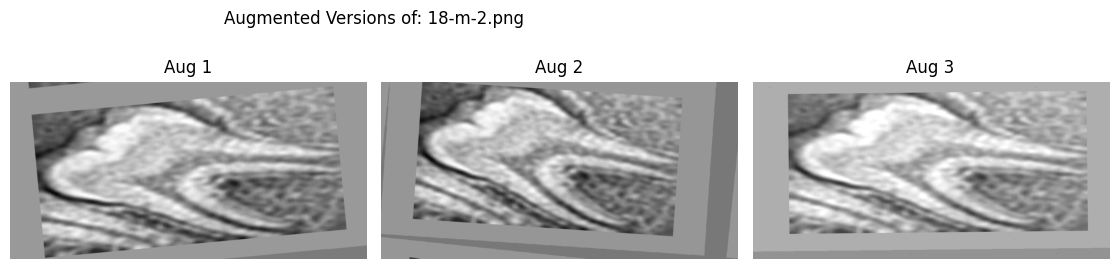

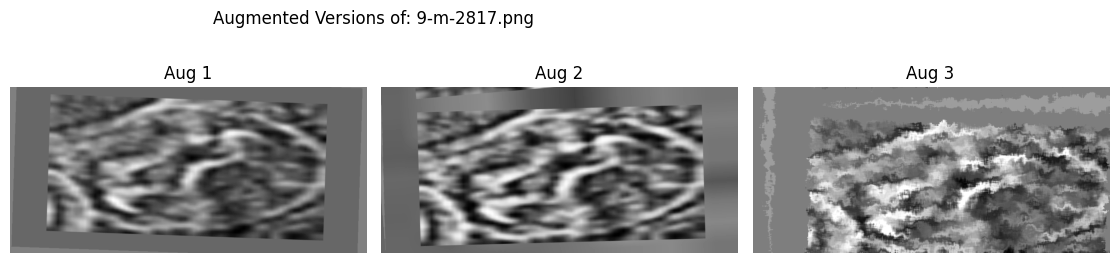

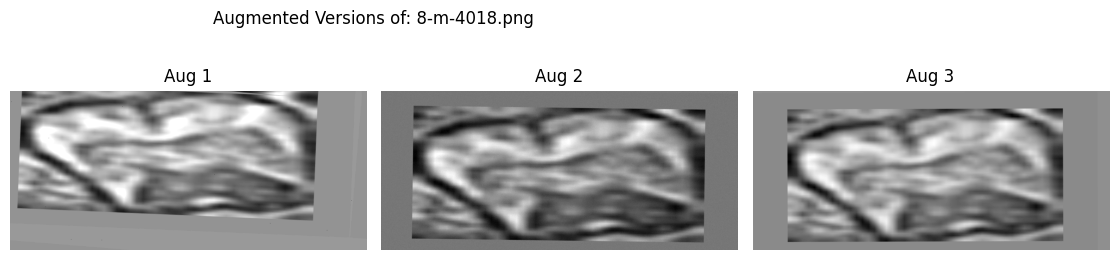

In [115]:
def visualize_augmentations(train_dataset_dir, num_samples=10, num_augmentations=3):
    """
    Visualize augmented versions of sample images from the dataset.
    
    Args:
        train_dataset_dir (str): Directory containing the training dataset
        num_samples (int): Number of sample images to visualize
        num_augmentations (int): Number of augmentations to show per image
    """
    # Initialize augmentation pipeline with conservative settings for medical images
    datagen = OPGAugmentationPipeline(intensity=0.4)
    
    # Collect sample images
    sample_images = []
    for class_name in os.listdir(train_dataset_dir):
        class_path = os.path.join(train_dataset_dir, class_name)
        if os.path.isdir(class_path):
            images = [os.path.join(class_path, f) for f in os.listdir(class_path) 
                     if f.endswith(('.png', '.jpg', '.jpeg'))]
            sample_images.extend(images[:2])  # Take 2 images from each class
        if len(sample_images) >= num_samples:
            break
    
    sample_images = sample_images[:num_samples]
    
    # Display augmented versions
    for img_path in sample_images:
        # Load and preprocess image
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        
        # Create figure
        plt.figure(figsize=(15, 3))
        
        # Generate and display augmentations
        for i in range(num_augmentations):
            aug_img = datagen(img.copy())
            plt.subplot(1, num_augmentations + 1, i + 2)
            plt.imshow(aug_img, cmap='gray')
            plt.title(f'Aug {i+1}')
            plt.axis('off')
        
        plt.suptitle(f"Augmented Versions of: {os.path.basename(img_path)}")
        plt.tight_layout()
        plt.show()
        
visualize_augmentations('/kaggle/working/train_test_val/train')

In [116]:
print(train_dataset_dir)
print(augmented_train_dir)

/kaggle/working/train_test_val/train
/kaggle/working/augmented_images/augmented_train


In [117]:
balance_dataset(train_dataset_dir, augmented_train_dir, 250, intensity=0.4)
# augment_dataset(train_dataset_dir, augmented_train_dir, 10)


Processing Age_11-14:
Original count = 53, Target = 250
Generating 197 augmented images...
Generated 50/197 augmentations
Generated 100/197 augmentations
Generated 150/197 augmentations

Processing Age_19-24:
Original count = 41, Target = 250
Generating 209 augmented images...
Generated 50/209 augmentations
Generated 100/209 augmentations
Generated 150/209 augmentations
Generated 200/209 augmentations

Processing Age_15-18:
Original count = 60, Target = 250
Generating 190 augmented images...
Generated 50/190 augmentations
Generated 100/190 augmentations
Generated 150/190 augmentations

Processing Age_7-10:
Original count = 30, Target = 250
Generating 220 augmented images...
Generated 50/220 augmentations
Generated 100/220 augmentations
Generated 150/220 augmentations
Generated 200/220 augmentations

Final class counts:
Age_11-14: 250 images
Age_19-24: 250 images
Age_15-18: 250 images
Age_7-10: 250 images


In [118]:
balance_dataset(val_dataset_dir, augmented_val_dir, 45, intensity=0.4)
# augment_dataset(val_dataset_dir, augmented_val_dir, 30)


Processing Age_11-14:
Original count = 24, Target = 45
Generating 21 augmented images...

Processing Age_19-24:
Original count = 18, Target = 45
Generating 27 augmented images...

Processing Age_15-18:
Original count = 26, Target = 45
Generating 19 augmented images...

Processing Age_7-10:
Original count = 13, Target = 45
Generating 32 augmented images...

Final class counts:
Age_11-14: 45 images
Age_19-24: 45 images
Age_15-18: 45 images
Age_7-10: 45 images


In [119]:
# Define the data directory for training and for validation/test
train_data_dir = '/kaggle/working/augmented_images/augmented_train'
val_data_dir = '/kaggle/working/augmented_images/augmented_val'

In [120]:
TRAIN = 'train'
VAL = 'val'

In [121]:
import torch
from torchvision import datasets, models, transforms

### Not Transformer

In [ ]:
# Define the batch size for each phase
batch_size_train = 32
batch_size_val = 16

# Define transformations for each phase
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize((299, 299)),
        transforms.RandomRotation(degrees=5),
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
        transforms.ToTensor(),
        transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
    ]),
    'val': transforms.Compose([
        transforms.Resize((299, 299)),
        transforms.ToTensor(),
        transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
    ])
}

# Create a dictionary of datasets for each phase (train, val)
image_datasets = {
    'train': datasets.ImageFolder(train_data_dir, transform=data_transforms['train']),
    'val': datasets.ImageFolder(val_data_dir, transform=data_transforms['val'])
}

# Create a dictionary of dataloaders for each phase
dataloaders = {
    'train': torch.utils.data.DataLoader(image_datasets['train'], batch_size=batch_size_train, shuffle=True, num_workers=4),
    'val': torch.utils.data.DataLoader(image_datasets['val'], batch_size=batch_size_val, shuffle=False, num_workers=4)
}

# Print dataloader sizes
for phase in ['train', 'val']:
    print(f"{phase} dataloader size: {len(dataloaders[phase])} batches")

In [ ]:
# Get the sizes of the datasets
dataset_sizes = {
    x: len(image_datasets[x]) 
    for x in [TRAIN, VAL]
}

# Get the classes from the training dataset
classes = image_datasets[TRAIN].classes

# Get the class names from the training dataset
class_names = image_datasets[TRAIN].classes

In [ ]:
print(class_names)
print(classes)
print(dataset_sizes)

num_classes = len(class_names)
print(num_classes)

In [ ]:
num_classes = len(class_names)
print(num_classes)

In [ ]:
if 'dataloaders' in globals() and 'TRAIN' in globals() and 'class_names' in globals():
    # Define the number of rows and columns for the subplot
    fig, axes = plt.subplots(3, 3, figsize=(12, 12))
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    # Loop to fill the grid with images
    for i in range(3):
        for j in range(3):
            try:
                # Get a batch of data
                inputs, classes = next(iter(dataloaders[TRAIN]))
                input_img = inputs[0]
                class_label = classes[0]

                # Debug statement
                print(f"Batch {i*6+j}: input_img shape {input_img.shape}, class_label {class_label}")

                # Prepare the image for display
                inp = input_img.numpy().transpose((1, 2, 0))
                mean = np.array([0.485, 0.456, 0.406])
                std = np.array([0.229, 0.224, 0.225])
                inp = std * inp + mean
                inp = np.clip(inp, 0, 1)

                # Convert to uint8 for CLAHE processing
                inp_uint8 = (inp * 255).astype(np.uint8)

                # Convert RGB to LAB color space
                lab = cv2.cvtColor(inp_uint8, cv2.COLOR_RGB2LAB)

                # Apply CLAHE to the L channel
                clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
                lab[:, :, 0] = clahe.apply(lab[:, :, 0])

                # Convert LAB back to RGB color space
                enhanced_img = cv2.cvtColor(lab, cv2.COLOR_LAB2RGB)

                # Plot the enhanced image
                axes[i, j].imshow(enhanced_img)
                axes[i, j].set_title(class_names[class_label.item()])
                axes[i, j].axis('off')
                
            except StopIteration:
                # Handle case where the dataloader is exhausted
                print("Dataloader exhausted, not enough images to fill the grid.")
                axes[i, j].axis('off')
                continue
            except Exception as e:
                # Catch other potential exceptions
                print(f"Error at {i*6+j}: {e}")
                axes[i, j].axis('off')
                continue

    plt.show()
else:
    print("Ensure dataloaders, TRAIN, and class_names are defined.")

### Model UTILS

In [ ]:
def load_checkpoint(model, optimizer, scheduler, checkpoint_path, device='cuda'):
    """
    Load a checkpoint to resume training.
    
    Parameters:
    model: PyTorch model architecture
    optimizer: PyTorch optimizer
    scheduler: Learning rate scheduler
    checkpoint_path: Path to the checkpoint (.pt file)
    device: Device to load the model to ('cuda' or 'cpu')
    
    Returns:
    model: Model with loaded weights
    optimizer: Optimizer with loaded state
    scheduler: Scheduler with loaded state
    epoch: Epoch number where training stopped
    metrics: Dictionary containing training history
    """
    checkpoint = torch.load(checkpoint_path, map_location=device)
    
    model.load_state_dict(checkpoint['model_state_dict'])
    optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
    scheduler.load_state_dict(checkpoint['scheduler_state_dict'])
    
    metrics = {
        'train_losses': checkpoint['train_losses'],
        'val_losses': checkpoint['val_losses'],
        'train_accuracies': checkpoint['train_accuracies'],
        'val_accuracies': checkpoint['val_accuracies']
    }
    
    return model, optimizer, scheduler, checkpoint['epoch'], metrics

In [ ]:
def load_model(model_path, device='cuda'):
    """
    Load a saved model.
    
    Parameters:
    model_path: Path to the saved model (.pth file)
    device: Device to load the model to ('cuda' or 'cpu')
    
    Returns:
    model: Loaded PyTorch model
    """
    model = torch.load(model_path)
    model = model.to(device)
    model.eval()  # Set to evaluation mode
    return model

# Model Implementation

In [ ]:
import copy
from tqdm import tqdm
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import AdamW

def train_model(model, criterion, optimizer, scheduler, num_epochs, dataloaders, 
                dataset_sizes, device, checkpoint_dir='/kaggle/working/'):
    """
    Train a PyTorch model with proper GPU support and checkpointing.
    """
    if not os.path.exists(checkpoint_dir):
        os.makedirs(checkpoint_dir)
        
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0
    
    # Initialize lists to store metrics
    train_losses, val_losses = [], []
    train_accuracies, val_accuracies = [], []
    
    for epoch in range(num_epochs):
        print(f"Epoch: {epoch+1}/{num_epochs}")
        print("="*10)
        
        for phase in ['train', 'val']:
            if phase == 'train':
                scheduler.step()
                model.train()
            else:
                model.eval()
                
            running_loss = 0.0
            running_corrects = 0
            num_batches = len(dataloaders[phase])
            
            with tqdm(total=num_batches, desc=f"{phase.capitalize()} Phase", unit='batch') as pbar:
                for data in dataloaders[phase]:
                    inputs, labels = data
                    inputs = inputs.to(device)
                    labels = labels.to(device)
                    
                    optimizer.zero_grad()
                    
                    with torch.set_grad_enabled(phase == 'train'):
                        outputs = model(inputs)
                        _, preds = torch.max(outputs, 1)
                        loss = criterion(outputs, labels)
                        
                        if phase == 'train':
                            loss.backward()
                            optimizer.step()
                    
                    running_loss += loss.item() * inputs.size(0)
                    running_corrects += torch.sum(preds == labels.data).cpu().item()
                    pbar.update(1)
            
            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects / dataset_sizes[phase]
            
            print(f'{phase.capitalize()} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')
            
            # Store metrics
            if phase == 'train':
                train_losses.append(epoch_loss)
                train_accuracies.append(epoch_acc)
            else:
                val_losses.append(epoch_loss)
                val_accuracies.append(epoch_acc)
            
            # Save checkpoint and model every 10 epochs
            if phase == 'val' and (epoch + 1) % 10 == 0:
                # Save checkpoint
                checkpoint_path = os.path.join(checkpoint_dir, f"checkpoint_epoch_{epoch + 1}.pt")
                torch.save({
                    'epoch': epoch + 1,
                    'model_state_dict': model.state_dict(),
                    'optimizer_state_dict': optimizer.state_dict(),
                    'scheduler_state_dict': scheduler.state_dict(),
                    'loss': epoch_loss,
                    'accuracy': epoch_acc,
                    'train_losses': train_losses,
                    'val_losses': val_losses,
                    'train_accuracies': train_accuracies,
                    'val_accuracies': val_accuracies
                }, checkpoint_path)
                
                # Save complete model
                model_path = os.path.join(checkpoint_dir, f"model_epoch_{epoch + 1}.pth")
                torch.save(model, model_path)
                
                print(f"Checkpoint saved at {checkpoint_path}")
                print(f"Model saved at {model_path}")
            
            # Update best model weights
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
    
    print(f'Best val Acc: {best_acc:4f}')
    
    # Load best model weights
    model.load_state_dict(best_model_wts)
    
    # Save the best model
    best_model_path = os.path.join(checkpoint_dir, "best_model.pth")
    torch.save(model, best_model_path)
    print(f"Best model saved at {best_model_path}")
    
    metrics = {
        'train_losses': train_losses,
        'val_losses': val_losses,
        'train_accuracies': train_accuracies,
        'val_accuracies': val_accuracies,
        'best_acc': best_acc
    }
    
    return model, metrics

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models
from torchvision.models import ResNet101_Weights

# Now use the pre-trained model
model_pre = models.resnet101(weights=ResNet101_Weights.DEFAULT)
# Freeze all parameters in the model
for param in model_pre.parameters():
    param.requires_grad = False
# Modify the average pooling layer to output a tensor of size (1, 1)
model_pre.avgpool = nn.AdaptiveAvgPool2d(output_size=(1, 1))
# Replace the final fully connected layers with a new sequence
model_pre.fc = nn.Sequential(
    nn.Flatten(),  # Flatten the output from the pooling layer
    nn.Linear(2048, 128),  # Fully connected layer with 2048 input features and 128 output features
    nn.ReLU(),  # ReLU activation function
    nn.Dropout(0.2),  # Dropout with 20% drop rate
    nn.Linear(128, num_classes)  # Final fully connected layer with 128 input features and 4 output features
)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Move the model to the correct device
model_pre = model_pre.to(device)
# Define the loss function
criterion = nn.CrossEntropyLoss()
# Define the optimizer, ensuring only the parameters of the new layers are updated
optimizer = optim.SGD(model_pre.fc.parameters(), lr=0.001, momentum=0.9, weight_decay=0.01)
# Define the learning rate scheduler
exp_lr_scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

In [ ]:
model, metrics = train_model(
    model=model_pre,
    criterion=criterion,
    optimizer=optimizer,
    scheduler=exp_lr_scheduler,
    num_epochs=30,
    dataloaders=dataloaders,
    dataset_sizes=dataset_sizes,
    device=device,
    checkpoint_dir='checkpoints'
)

In [ ]:
train_losses = metrics['train_losses']
val_losses = metrics['val_losses']
train_accuracies = metrics['train_accuracies']
val_accuracies = metrics['val_accuracies']
best_acc = metrics['best_acc']
# Plot Loss
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
class_names

### Result

In [79]:
import torch

def predict_on_test_images(dataloader, model, device):
    """
    Predicts labels for test images using the trained model.

    Parameters:
    - dataloader: DataLoader object containing the test dataset
    - model: The trained model to evaluate
    - device: Device to perform calculations (CPU or GPU)

    Returns:
    - all_preds: List of predicted labels
    - all_labels: List of true labels
    """
    model.eval()  # Set the model to evaluation mode
    all_preds = []
    all_labels = []

    with torch.no_grad():  # No need to compute gradients during inference
        for inputs, labels in dataloader:
            inputs = inputs.to(device)  # Move inputs to the correct device
            labels = labels.to(device)  # Move labels to the correct device

            outputs = model(inputs)  # Get model outputs
            _, preds = torch.max(outputs, 1)  # Get predicted class indices

            all_preds.extend(preds.cpu().numpy())  # Store predictions
            all_labels.extend(labels.cpu().numpy())  # Store true labels

    return all_preds, all_labels

In [ ]:
all_predictions, all_true_labels = predict_on_test_images(dataloaders[VAL], model_pre, device)

# You can then print or analyze the predictions as needed
print("Predictions:", all_predictions)
print("True Labels:", all_true_labels)

In [88]:
import numpy as np
import torch
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def compute_confusion_matrix(true_labels, predicted_labels, class_names):
    """
    Computes and prints the confusion matrix.

    Parameters:
    - true_labels: List of true labels
    - predicted_labels: List of predicted labels
    - class_names: List of class names corresponding to the labels

    Returns:
    - Confusion matrix as a NumPy array
    """
    # Compute confusion matrix
    cm = confusion_matrix(true_labels, predicted_labels)

    # Plot the confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

    return cm

In [ ]:
# Assuming you have true labels and predictions
# all_true_labels and all_predictions are obtained from your earlier predictions
cm = compute_confusion_matrix(all_true_labels, all_predictions, class_names)

# If you just want to print the confusion matrix without plotting, you can do:
print("Confusion Matrix:")
print(cm)

In [ ]:
import random 

image_dir = "/kaggle/input/opg-mask"
png_files = [f for f in os.listdir(image_dir) if f.endswith(".png")]

# Select 15 random sample images
sample_images = random.sample(png_files, 25)

# Iterate through the sample images and make predictions
for sample_image in sample_images:
    sample_image_path = os.path.join(image_dir, sample_image)
    original_combined = visualize_masks(sample_image_path)
    inputs = torch.from_numpy(original_combined).unsqueeze(0).repeat(1, 3, 1, 1).to(device).float()

    # Make a prediction using the pre-trained model
    with torch.no_grad():
        outputs = model_pre(inputs)  # Ensure you call the model with model_pre
        _, predicted_class = torch.max(outputs, 1)

    # Get the predicted class name
    predicted_label = class_names[predicted_class.item()]

    print(f"Predicted class for {sample_image}: {predicted_label}")

## Using transformers

In [122]:
# Define transformations for each phase

from torchvision import transforms

data_transforms = {
    TRAIN: transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomRotation(5),
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
        transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], 
                           std=[0.229, 0.224, 0.225])
    ]),
    VAL: transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], 
                           std=[0.229, 0.224, 0.225])
    ])
}

# Create a dictionary of datasets for each phase (TRAIN, VAL)
image_datasets = {
    TRAIN: datasets.ImageFolder(train_data_dir, transform=data_transforms[TRAIN]),
    VAL: datasets.ImageFolder(val_data_dir, transform=data_transforms[VAL]),
}

# Define batch sizes
batch_size_train = 32
batch_size_val_test = 8

# Create a dictionary of dataloaders for each phase
dataloaders = {
    TRAIN: torch.utils.data.DataLoader(image_datasets[TRAIN], batch_size=batch_size_train, shuffle=True, num_workers=4),
    VAL: torch.utils.data.DataLoader(image_datasets[VAL], batch_size=batch_size_val_test, shuffle=False, num_workers=4),
}

# Print dataloader sizes
for phase in [TRAIN, VAL]:
    print(f"{phase} dataloader size: {len(dataloaders[phase])} batches")

train dataloader size: 32 batches
val dataloader size: 23 batches


In [123]:
# Get the sizes of the datasets
dataset_sizes = {
    x: len(image_datasets[x]) 
    for x in [TRAIN, VAL]
}

# Get the classes from the training dataset
classes = image_datasets[TRAIN].classes

# Get the class names from the training dataset
class_names = image_datasets[TRAIN].classes

In [124]:
print(class_names)
print(classes)
print(dataset_sizes)

num_classes = len(class_names)
print(num_classes)

['Age_11-14', 'Age_15-18', 'Age_19-24', 'Age_7-10']
['Age_11-14', 'Age_15-18', 'Age_19-24', 'Age_7-10']
{'train': 1000, 'val': 180}
4


In [45]:
!pip install -q timm

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


In [135]:
# import torch
# import torch.nn as nn
# from timm.models import vit_small_patch16_224

# class CustomViT(nn.Module):
#     def __init__(self, num_classes=num_classes):
#         super().__init__()
#         # Load the base ViT model
#         self.vit = vit_small_patch16_224(pretrained=True)
        
#         # Remove the original head
#         in_features = self.vit.head.in_features
#         self.vit.head = nn.Identity()
        
#         # Create new head with Layer Normalization instead of Batch Normalization
#         self.head = nn.Sequential(
#             nn.LayerNorm(in_features),
#             nn.Dropout(0.3),
#             nn.Linear(in_features, 512),
#             nn.GELU(),
#             nn.Dropout(0.3),
#             nn.Linear(512, num_classes)
#         )
        
#     def forward(self, x):
#         # Get features from ViT
#         x = self.vit(x)
#         # Apply new head
#         x = self.head(x)
#         return x

In [159]:
## vit_b_16
from torch.optim.lr_scheduler import CosineAnnealingLR
from torchvision.models import vit_b_16, ViT_B_16_Weights


model = vit_b_16(weights=ViT_B_16_Weights.DEFAULT)
model.heads.head = nn.Linear(model.heads.head.in_features, num_classes)

In [160]:
criterion = nn.CrossEntropyLoss()
optimizer = AdamW(model.parameters(), lr=1e-4)
scheduler = CosineAnnealingLR(optimizer, T_max=10)

In [161]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
num_epochs = 30

In [162]:
model = model.to(device)

In [144]:
# # Create the model
# model = CustomViT(num_classes=4)
# model = model.to(device)

In [ ]:
# # Adjust learning rate and add warmup
# from torch.optim.lr_scheduler import OneCycleLR
# from torch.optim import AdamW
# import copy


# # Define optimizer with different learning rates
# optimizer = AdamW([
#     {'params': model.vit.parameters(), 'lr': 1e-5},  # Lower learning rate for pretrained parts
#     {'params': model.head.parameters(), 'lr': 1e-4}  # Higher learning rate for new head
# ], weight_decay=0.01)

# # Use OneCycleLR scheduler instead
# scheduler = OneCycleLR(
#     optimizer,
#     max_lr=[1e-5, 1e-4],  # Different max_lr for different parameter groups
#     steps_per_epoch=len(dataloaders[TRAIN]),
#     epochs=num_epochs,
#     pct_start=0.3  # Use 30% of training for warmup
# )

# criterion = nn.CrossEntropyLoss(label_smoothing=0.1)

In [66]:
# class EarlyStopping:
#     def __init__(self, patience=5, min_delta=0.001):
#         self.patience = patience
#         self.min_delta = min_delta
#         self.counter = 0
#         self.best_loss = None
#         self.early_stop = False
        
#     def __call__(self, val_loss):
#         if self.best_loss is None:
#             self.best_loss = val_loss
#         elif val_loss > self.best_loss - self.min_delta:
#             self.counter += 1
#             if self.counter >= self.patience:
#                 self.early_stop = True
#         else:
#             self.best_loss = val_loss
#             self.counter = 0

In [150]:
# from tqdm import tqdm

# def train_visual_transformer(model, criterion, optimizer, scheduler, num_epochs, dataloaders, dataset_sizes, device, checkpoint_dir='/kaggle/working/'):
#     """
#     Train a visual transformer model for medical imaging with improved regularization and monitoring.
#     """
#     if not os.path.exists(checkpoint_dir):
#         os.makedirs(checkpoint_dir)
    
#     best_model_wts = copy.deepcopy(model.state_dict())
#     best_acc = 0.0
#     best_loss = float('inf')
    
#     # Initialize lists to store metrics
#     train_losses, val_losses = [], []
#     train_accuracies, val_accuracies = [], []
    
#     # Mixup function for training
#     def mixup_data(x, y, alpha=0.2):
#         if alpha > 0:
#             lam = np.random.beta(alpha, alpha)
#         else:
#             lam = 1
#         batch_size = x.size()[0]
#         index = torch.randperm(batch_size).to(device)
#         mixed_x = lam * x + (1 - lam) * x[index]
#         y_a, y_b = y, y[index]
#         return mixed_x, y_a, y_b, lam
    
#     for epoch in range(num_epochs):
#         print(f"Epoch: {epoch+1}/{num_epochs}")
#         print("="*10)
        
#         for phase in ['train', 'val']:
#             if phase == 'train':
#                 model.train()
#             else:
#                 model.eval()
                
#             running_loss = 0.0
#             running_corrects = 0
#             num_batches = len(dataloaders[phase])
            
#             with tqdm(total=num_batches, desc=f"{phase.capitalize()} Phase", unit='batch') as pbar:
#                 for data in dataloaders[phase]:
#                     inputs, labels = data
#                     inputs = inputs.to(device)
#                     labels = labels.to(device)
                    
#                     optimizer.zero_grad()
                    
#                     # Initialize mixup variables
#                     use_mixup = phase == 'train' and np.random.random() > 0.5
#                     labels_a = None
#                     labels_b = None
#                     lam = 0
                    
#                     with torch.set_grad_enabled(phase == 'train'):
#                         if use_mixup:
#                             # Apply mixup augmentation during training
#                             inputs, labels_a, labels_b, lam = mixup_data(inputs, labels)
#                             outputs = model(inputs)
#                             loss = lam * criterion(outputs, labels_a) + (1 - lam) * criterion(outputs, labels_b)
#                         else:
#                             outputs = model(inputs)
#                             loss = criterion(outputs, labels)
                        
#                         _, preds = torch.max(outputs, 1)
                        
#                         if phase == 'train':
#                             loss.backward()
#                             # Add gradient clipping
#                             torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
#                             optimizer.step()
#                             if scheduler is not None:
#                                 scheduler.step()
                    
#                     running_loss += loss.item() * inputs.size(0)
#                     if use_mixup:
#                         # For mixup, use the dominant label
#                         running_corrects += torch.sum(preds == (labels_a if lam > 0.5 else labels_b).data).cpu().item()
#                     else:
#                         running_corrects += torch.sum(preds == labels.data).cpu().item()
#                     pbar.update(1)
            
#             epoch_loss = running_loss / dataset_sizes[phase]
#             epoch_acc = running_corrects / dataset_sizes[phase]
            
#             print(f'{phase.capitalize()} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')
            
#             # Store metrics
#             if phase == 'train':
#                 train_losses.append(epoch_loss)
#                 train_accuracies.append(epoch_acc)
#             else:
#                 val_losses.append(epoch_loss)
#                 val_accuracies.append(epoch_acc)
            
#             # Save checkpoint and model every 5 epochs or when validation improves
#             if phase == 'val':
#                 if epoch_loss < best_loss:
#                     best_loss = epoch_loss
#                     best_acc = epoch_acc
#                     best_model_wts = copy.deepcopy(model.state_dict())
                    
#                     # Save best model
#                     best_model_path = os.path.join(checkpoint_dir, "best_model.pth")
#                     torch.save({
#                         'epoch': epoch + 1,
#                         'model_state_dict': model.state_dict(),
#                         'optimizer_state_dict': optimizer.state_dict(),
#                         'scheduler_state_dict': scheduler.state_dict() if scheduler else None,
#                         'loss': best_loss,
#                         'accuracy': best_acc,
#                         'train_losses': train_losses,
#                         'val_losses': val_losses,
#                         'train_accuracies': train_accuracies,
#                         'val_accuracies': val_accuracies
#                     }, best_model_path)
#                     print(f"New best model saved with validation loss: {best_loss:.4f}")
                
#                 if (epoch + 1) % 5 == 0:
#                     checkpoint_path = os.path.join(checkpoint_dir, f"checkpoint_epoch_{epoch + 1}.pt")
#                     torch.save({
#                         'epoch': epoch + 1,
#                         'model_state_dict': model.state_dict(),
#                         'optimizer_state_dict': optimizer.state_dict(),
#                         'scheduler_state_dict': scheduler.state_dict() if scheduler else None,
#                         'loss': epoch_loss,
#                         'accuracy': epoch_acc,
#                         'train_losses': train_losses,
#                         'val_losses': val_losses,
#                         'train_accuracies': train_accuracies,
#                         'val_accuracies': val_accuracies
#                     }, checkpoint_path)
#                     print(f"Checkpoint saved at {checkpoint_path}")
    
#     print(f'Best val Acc: {best_acc:4f}, Best val Loss: {best_loss:4f}')
    
#     # Load best model weights
#     model.load_state_dict(best_model_wts)
    
#     metrics = {
#         'train_losses': train_losses,
#         'val_losses': val_losses,
#         'train_accuracies': train_accuracies,
#         'val_accuracies': val_accuracies,
#         'best_acc': best_acc,
#         'best_loss': best_loss
#     }
    
#     return model, metrics

In [155]:
def train_visual_transformer(model, criterion, optimizer, scheduler, num_epochs, dataloaders, dataset_sizes, device, checkpoint_dir='/kaggle/working/'):
    """
    Train a visual transformer model for medical imaging with improved regularization and monitoring.
    """
    if not os.path.exists(checkpoint_dir):
        os.makedirs(checkpoint_dir)
    
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0  # Track the best validation accuracy
    best_loss = float('inf')  # For reference
    
    # Initialize lists to store metrics
    train_losses, val_losses = [], []
    train_accuracies, val_accuracies = [], []
    
    # Mixup function for training
    def mixup_data(x, y, alpha=0.2):
        if alpha > 0:
            lam = np.random.beta(alpha, alpha)
        else:
            lam = 1
        batch_size = x.size()[0]
        index = torch.randperm(batch_size).to(device)
        mixed_x = lam * x + (1 - lam) * x[index]
        y_a, y_b = y, y[index]
        return mixed_x, y_a, y_b, lam
    
    for epoch in range(num_epochs):
        print(f"Epoch: {epoch+1}/{num_epochs}")
        print("="*10)
        
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()
            else:
                model.eval()
                
            running_loss = 0.0
            running_corrects = 0
            num_batches = len(dataloaders[phase])
            
            with tqdm(total=num_batches, desc=f"{phase.capitalize()} Phase", unit='batch') as pbar:
                for data in dataloaders[phase]:
                    inputs, labels = data
                    inputs = inputs.to(device)
                    labels = labels.to(device)
                    
                    optimizer.zero_grad()
                    
                    # Initialize mixup variables
                    use_mixup = phase == 'train' and np.random.random() > 0.5
                    labels_a = None
                    labels_b = None
                    lam = 0
                    
                    with torch.set_grad_enabled(phase == 'train'):
                        if use_mixup:
                            # Apply mixup augmentation during training
                            inputs, labels_a, labels_b, lam = mixup_data(inputs, labels)
                            outputs = model(inputs)
                            loss = lam * criterion(outputs, labels_a) + (1 - lam) * criterion(outputs, labels_b)
                        else:
                            outputs = model(inputs)
                            loss = criterion(outputs, labels)
                        
                        _, preds = torch.max(outputs, 1)
                        
                        if phase == 'train':
                            loss.backward()
                            # Add gradient clipping
                            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
                            optimizer.step()
                            if scheduler is not None:
                                scheduler.step()
                    
                    running_loss += loss.item() * inputs.size(0)
                    if use_mixup:
                        # For mixup, use the dominant label
                        running_corrects += torch.sum(preds == (labels_a if lam > 0.5 else labels_b).data).cpu().item()
                    else:
                        running_corrects += torch.sum(preds == labels.data).cpu().item()
                    pbar.update(1)
            
            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects / dataset_sizes[phase]
            
            print(f'{phase.capitalize()} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')
            
            # Store metrics
            if phase == 'train':
                train_losses.append(epoch_loss)
                train_accuracies.append(epoch_acc)
            else:
                val_losses.append(epoch_loss)
                val_accuracies.append(epoch_acc)
            
            # Save best model based on validation accuracy
            if phase == 'val':
                if epoch_acc > best_acc:  # Save when validation accuracy improves
                    best_acc = epoch_acc
                    best_loss = epoch_loss  # Save corresponding loss
                    best_model_wts = copy.deepcopy(model.state_dict())
                    
                    # Save best model with highest accuracy
                    best_model_path = os.path.join(checkpoint_dir, "best_model.pth")
                    torch.save({
                        'epoch': epoch + 1,
                        'model_state_dict': model.state_dict(),
                        'optimizer_state_dict': optimizer.state_dict(),
                        'scheduler_state_dict': scheduler.state_dict() if scheduler else None,
                        'loss': best_loss,
                        'accuracy': best_acc,
                        'train_losses': train_losses,
                        'val_losses': val_losses,
                        'train_accuracies': train_accuracies,
                        'val_accuracies': val_accuracies
                    }, best_model_path)
                    print(f"New best model saved with validation accuracy: {best_acc:.4f}")
                
                if (epoch + 1) % 5 == 0:
                    checkpoint_path = os.path.join(checkpoint_dir, f"checkpoint_epoch_{epoch + 1}.pt")
                    torch.save({
                        'epoch': epoch + 1,
                        'model_state_dict': model.state_dict(),
                        'optimizer_state_dict': optimizer.state_dict(),
                        'scheduler_state_dict': scheduler.state_dict() if scheduler else None,
                        'loss': epoch_loss,
                        'accuracy': epoch_acc,
                        'train_losses': train_losses,
                        'val_losses': val_losses,
                        'train_accuracies': train_accuracies,
                        'val_accuracies': val_accuracies
                    }, checkpoint_path)
                    print(f"Checkpoint saved at {checkpoint_path}")
    
    print(f'Best val Acc: {best_acc:4f}, Best val Loss: {best_loss:4f}')
    
    # Load best model weights
    model.load_state_dict(best_model_wts)
    
    metrics = {
        'train_losses': train_losses,
        'val_losses': val_losses,
        'train_accuracies': train_accuracies,
        'val_accuracies': val_accuracies,
        'best_acc': best_acc,
        'best_loss': best_loss
    }
    
    return model, metrics

In [163]:
model, metrics = train_visual_transformer(
    model,
    criterion,
    optimizer,
    scheduler,
    num_epochs,
    dataloaders,
    dataset_sizes,
    device
)

Epoch: 1/30


Train Phase:   0%|          | 0/32 [00:00<?, ?batch/s]/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Train Phase: 100%|██████████| 32/32 [00:38<00:00,  1.11batch/s]/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Train Phase: 100%|██████████| 32/32 [00:38<00:00,  1.20s/batch]


Train Loss: 1.2162 Acc: 0.4640


Val Phase: 100%|██████████| 23/23 [00:02<00:00,  9.17batch/s]


Val Loss: 0.8728 Acc: 0.6333
New best model saved with validation accuracy: 0.6333
Epoch: 2/30


Train Phase: 100%|██████████| 32/32 [00:36<00:00,  1.14s/batch]


Train Loss: 0.9380 Acc: 0.6500


Val Phase: 100%|██████████| 23/23 [00:02<00:00,  9.12batch/s]


Val Loss: 1.0240 Acc: 0.5611
Epoch: 3/30


Train Phase: 100%|██████████| 32/32 [00:37<00:00,  1.16s/batch]


Train Loss: 0.7165 Acc: 0.7380


Val Phase: 100%|██████████| 23/23 [00:02<00:00,  9.24batch/s]


Val Loss: 0.9610 Acc: 0.6667
New best model saved with validation accuracy: 0.6667
Epoch: 4/30


Train Phase: 100%|██████████| 32/32 [00:36<00:00,  1.15s/batch]


Train Loss: 0.5799 Acc: 0.8040


Val Phase: 100%|██████████| 23/23 [00:02<00:00,  9.18batch/s]


Val Loss: 1.1272 Acc: 0.6222
Epoch: 5/30


Train Phase: 100%|██████████| 32/32 [00:37<00:00,  1.16s/batch]


Train Loss: 0.5118 Acc: 0.8400


Val Phase: 100%|██████████| 23/23 [00:02<00:00,  9.15batch/s]


Val Loss: 0.9389 Acc: 0.7278
New best model saved with validation accuracy: 0.7278
Checkpoint saved at /kaggle/working/checkpoint_epoch_5.pt
Epoch: 6/30


Train Phase: 100%|██████████| 32/32 [00:37<00:00,  1.16s/batch]


Train Loss: 0.3106 Acc: 0.9160


Val Phase: 100%|██████████| 23/23 [00:02<00:00,  9.19batch/s]


Val Loss: 0.9853 Acc: 0.6222
Epoch: 7/30


Train Phase: 100%|██████████| 32/32 [00:36<00:00,  1.15s/batch]


Train Loss: 0.3038 Acc: 0.9270


Val Phase: 100%|██████████| 23/23 [00:02<00:00,  9.24batch/s]


Val Loss: 1.3614 Acc: 0.5889
Epoch: 8/30


Train Phase: 100%|██████████| 32/32 [00:36<00:00,  1.15s/batch]


Train Loss: 0.3681 Acc: 0.9050


Val Phase: 100%|██████████| 23/23 [00:02<00:00,  9.17batch/s]


Val Loss: 0.9852 Acc: 0.7056
Epoch: 9/30


Train Phase: 100%|██████████| 32/32 [00:36<00:00,  1.15s/batch]


Train Loss: 0.2995 Acc: 0.9250


Val Phase: 100%|██████████| 23/23 [00:02<00:00,  9.17batch/s]


Val Loss: 1.3666 Acc: 0.6500
Epoch: 10/30


Train Phase: 100%|██████████| 32/32 [00:37<00:00,  1.16s/batch]


Train Loss: 0.3257 Acc: 0.9310


Val Phase: 100%|██████████| 23/23 [00:02<00:00,  9.14batch/s]


Val Loss: 1.2392 Acc: 0.6667
Checkpoint saved at /kaggle/working/checkpoint_epoch_10.pt
Epoch: 11/30


Train Phase: 100%|██████████| 32/32 [00:36<00:00,  1.16s/batch]


Train Loss: 0.1846 Acc: 0.9590


Val Phase: 100%|██████████| 23/23 [00:02<00:00,  9.18batch/s]


Val Loss: 1.4407 Acc: 0.6222
Epoch: 12/30


Train Phase: 100%|██████████| 32/32 [00:37<00:00,  1.16s/batch]


Train Loss: 0.2375 Acc: 0.9360


Val Phase: 100%|██████████| 23/23 [00:02<00:00,  9.21batch/s]


Val Loss: 1.7481 Acc: 0.6167
Epoch: 13/30


Train Phase: 100%|██████████| 32/32 [00:36<00:00,  1.16s/batch]


Train Loss: 0.3097 Acc: 0.9190


Val Phase: 100%|██████████| 23/23 [00:02<00:00,  9.27batch/s]


Val Loss: 1.3338 Acc: 0.6500
Epoch: 14/30


Train Phase: 100%|██████████| 32/32 [00:37<00:00,  1.16s/batch]


Train Loss: 0.2696 Acc: 0.9510


Val Phase: 100%|██████████| 23/23 [00:02<00:00,  9.17batch/s]


Val Loss: 1.6011 Acc: 0.6167
Epoch: 15/30


Train Phase: 100%|██████████| 32/32 [00:36<00:00,  1.16s/batch]


Train Loss: 0.2343 Acc: 0.9440


Val Phase: 100%|██████████| 23/23 [00:02<00:00,  9.15batch/s]


Val Loss: 1.8568 Acc: 0.6722
Checkpoint saved at /kaggle/working/checkpoint_epoch_15.pt
Epoch: 16/30


Train Phase: 100%|██████████| 32/32 [00:37<00:00,  1.16s/batch]


Train Loss: 0.1615 Acc: 0.9620


Val Phase: 100%|██████████| 23/23 [00:02<00:00,  9.17batch/s]


Val Loss: 1.5120 Acc: 0.6667
Epoch: 17/30


Train Phase: 100%|██████████| 32/32 [00:36<00:00,  1.15s/batch]


Train Loss: 0.3489 Acc: 0.9270


Val Phase: 100%|██████████| 23/23 [00:02<00:00,  9.28batch/s]


Val Loss: 1.2623 Acc: 0.6500
Epoch: 18/30


Train Phase: 100%|██████████| 32/32 [00:36<00:00,  1.15s/batch]


Train Loss: 0.2626 Acc: 0.9530


Val Phase: 100%|██████████| 23/23 [00:02<00:00,  9.20batch/s]


Val Loss: 1.3345 Acc: 0.7333
New best model saved with validation accuracy: 0.7333
Epoch: 19/30


Train Phase: 100%|██████████| 32/32 [00:37<00:00,  1.16s/batch]


Train Loss: 0.2495 Acc: 0.9480


Val Phase: 100%|██████████| 23/23 [00:02<00:00,  9.06batch/s]


Val Loss: 1.4624 Acc: 0.6944
Epoch: 20/30


Train Phase: 100%|██████████| 32/32 [00:37<00:00,  1.16s/batch]


Train Loss: 0.3352 Acc: 0.9390


Val Phase: 100%|██████████| 23/23 [00:02<00:00,  9.23batch/s]


Val Loss: 1.4139 Acc: 0.6667
Checkpoint saved at /kaggle/working/checkpoint_epoch_20.pt
Epoch: 21/30


Train Phase: 100%|██████████| 32/32 [00:36<00:00,  1.15s/batch]


Train Loss: 0.2154 Acc: 0.9560


Val Phase: 100%|██████████| 23/23 [00:02<00:00,  9.22batch/s]


Val Loss: 1.6020 Acc: 0.6889
Epoch: 22/30


Train Phase: 100%|██████████| 32/32 [00:36<00:00,  1.16s/batch]


Train Loss: 0.3084 Acc: 0.9410


Val Phase: 100%|██████████| 23/23 [00:02<00:00,  9.25batch/s]


Val Loss: 1.3112 Acc: 0.7000
Epoch: 23/30


Train Phase: 100%|██████████| 32/32 [00:36<00:00,  1.15s/batch]


Train Loss: 0.1889 Acc: 0.9600


Val Phase: 100%|██████████| 23/23 [00:02<00:00,  9.28batch/s]


Val Loss: 1.6085 Acc: 0.6833
Epoch: 24/30


Train Phase: 100%|██████████| 32/32 [00:36<00:00,  1.15s/batch]


Train Loss: 0.2989 Acc: 0.9430


Val Phase: 100%|██████████| 23/23 [00:02<00:00,  9.20batch/s]


Val Loss: 1.7244 Acc: 0.7000
Epoch: 25/30


Train Phase: 100%|██████████| 32/32 [00:36<00:00,  1.16s/batch]


Train Loss: 0.2627 Acc: 0.9530


Val Phase: 100%|██████████| 23/23 [00:02<00:00,  9.22batch/s]


Val Loss: 1.4900 Acc: 0.6556
Checkpoint saved at /kaggle/working/checkpoint_epoch_25.pt
Epoch: 26/30


Train Phase: 100%|██████████| 32/32 [00:36<00:00,  1.16s/batch]


Train Loss: 0.1913 Acc: 0.9680


Val Phase: 100%|██████████| 23/23 [00:02<00:00,  9.25batch/s]


Val Loss: 1.3873 Acc: 0.7056
Epoch: 27/30


Train Phase: 100%|██████████| 32/32 [00:36<00:00,  1.15s/batch]


Train Loss: 0.1559 Acc: 0.9700


Val Phase: 100%|██████████| 23/23 [00:02<00:00,  9.27batch/s]


Val Loss: 1.4637 Acc: 0.6944
Epoch: 28/30


Train Phase: 100%|██████████| 32/32 [00:36<00:00,  1.15s/batch]


Train Loss: 0.1352 Acc: 0.9750


Val Phase: 100%|██████████| 23/23 [00:02<00:00,  9.24batch/s]


Val Loss: 1.4903 Acc: 0.6944
Epoch: 29/30


Train Phase: 100%|██████████| 32/32 [00:37<00:00,  1.16s/batch]


Train Loss: 0.2439 Acc: 0.9420


Val Phase: 100%|██████████| 23/23 [00:02<00:00,  9.26batch/s]


Val Loss: 1.4219 Acc: 0.7389
New best model saved with validation accuracy: 0.7389
Epoch: 30/30


Train Phase: 100%|██████████| 32/32 [00:37<00:00,  1.16s/batch]


Train Loss: 0.2793 Acc: 0.9350


Val Phase: 100%|██████████| 23/23 [00:02<00:00,  9.02batch/s]


Val Loss: 1.9646 Acc: 0.6556
Checkpoint saved at /kaggle/working/checkpoint_epoch_30.pt
Best val Acc: 0.738889, Best val Loss: 1.421915


In [164]:
all_predictions, all_true_labels = predict_on_test_images(dataloaders[VAL], model, device)

# You can then print or analyze the predictions as needed
print("Predictions:", all_predictions)
print("True Labels:", all_true_labels)

Predictions: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 2, 2, 0, 1, 3, 3, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 2, 2, 1, 2, 1, 1, 1, 1, 0, 0, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 3, 3, 3, 3, 1, 1, 1, 3, 3, 1, 3, 3, 3, 3, 3, 3]
True Labels: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 

In [165]:
# Calculate accuracy
correct_predictions = sum(p == t for p, t in zip(all_predictions, all_true_labels))
accuracy = correct_predictions / len(all_true_labels) * 100  # Multiply by 100 for percentage

# Print accuracy
print(f"Accuracy: {accuracy:.2f}%")

Accuracy: 73.89%


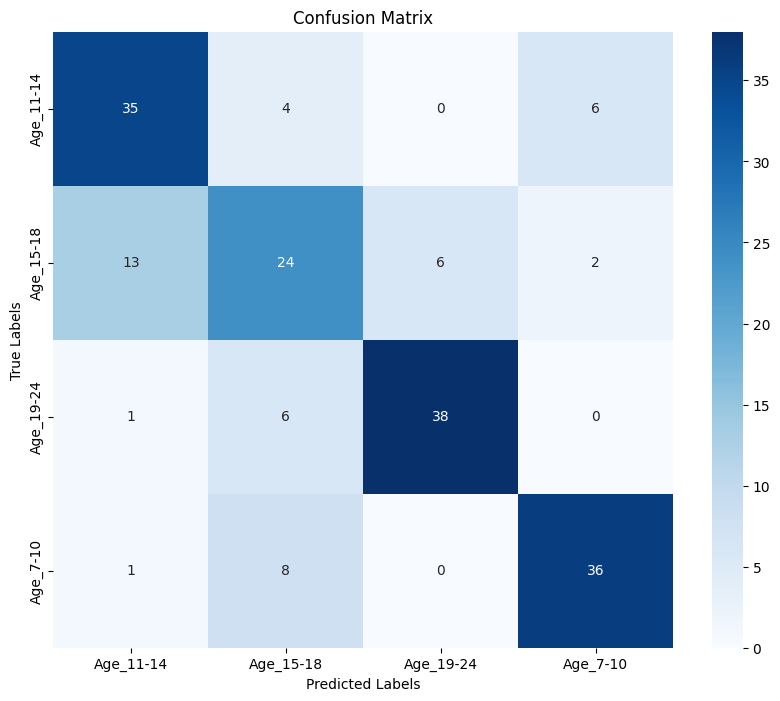

Confusion Matrix:
[[35  4  0  6]
 [13 24  6  2]
 [ 1  6 38  0]
 [ 1  8  0 36]]


In [166]:
cm2 = compute_confusion_matrix(all_true_labels, all_predictions, class_names)

# If you just want to print the confusion matrix without plotting, you can do:
print("Confusion Matrix:")
print(cm2)

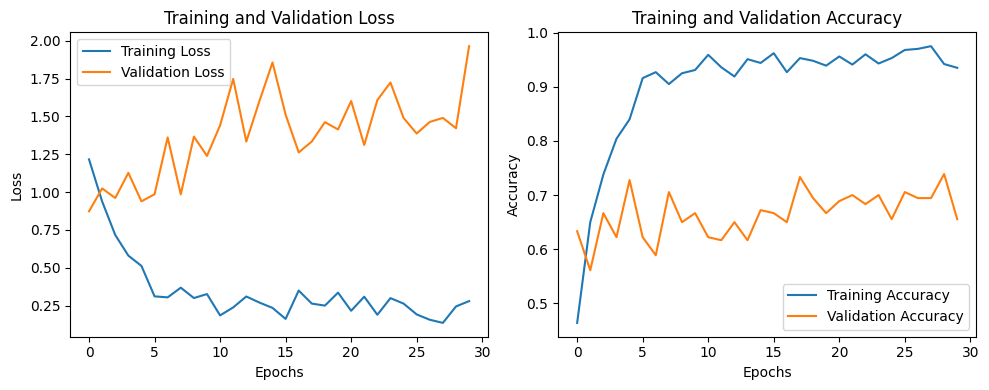

In [167]:
train_losses = metrics['train_losses']
val_losses = metrics['val_losses']
train_accuracies = metrics['train_accuracies']
val_accuracies = metrics['val_accuracies']
best_acc = metrics['best_acc']
# Plot Loss
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [85]:
import random 

# Define preprocessing steps
def preprocess_image(image):
    # Resize to 224x224 as expected by ViT
    image_resized = cv2.resize(image, (224, 224))
    
    # Normalize pixel values to range [0, 1]
    image_normalized = image_resized / 255.0

    # Convert to a torch tensor and add batch dimension and color channels
    image_tensor = torch.from_numpy(image_normalized).unsqueeze(0).repeat(1, 3, 1, 1)
    return image_tensor.float()

image_dir = "/kaggle/input/opg-mask"
png_files = [f for f in os.listdir(image_dir) if f.endswith(".png")]

# Select 15 random sample images
sample_images = random.sample(png_files, 35)

# Iterate through the sample images and make predictions
for sample_image in sample_images:
    sample_image_path = os.path.join(image_dir, sample_image)
    original_combined = visualize_masks(sample_image_path)
    
    inputs = preprocess_image(original_combined).to("cuda" if torch.cuda.is_available() else "cpu")

    # Make a prediction using the model
    with torch.no_grad():
        outputs = model(inputs)
        _, predicted_class = torch.max(outputs, 1)

    # Get the predicted class name
    predicted_label = class_names[predicted_class.item()]
    print(f"Predicted class for {sample_image}: {predicted_label}")

Predicted class for 15-m-5067.png: Age_15-18
Predicted class for 12-f-19.png: Age_7-14
Predicted class for 14-m-19.png: Age_7-14
Predicted class for 15-m-2493.png: Age_7-14
Predicted class for 12-f-199.png: Age_7-14
Predicted class for 17-m-3262.png: Age_19-24
Predicted class for 21-m-2222.png: Age_15-18
Predicted class for 18-m-3443.png: Age_19-24
Predicted class for 23-f-6195.png: Age_19-24
Predicted class for 12-f-7895.png: Age_7-14
Predicted class for 14-m-3257.png: Age_15-18
Predicted class for 17-f-9463.png: Age_15-18
Predicted class for 15-f-11.png: Age_15-18
Predicted class for 22-f-473.png: Age_19-24
Predicted class for 17-f-3.png: Age_15-18
Predicted class for 22-m-8760.png: Age_19-24
Predicted class for 17-f-248.png: Age_15-18
Predicted class for 8-m-4018.png: Age_7-14
Predicted class for 23-f-5859.png: Age_19-24
Predicted class for 18-m-4767.png: Age_15-18
Predicted class for 20-f-8202.png: Age_19-24
Predicted class for 16-f-5825.png: Age_15-18
Predicted class for 14-m-26.p

In [86]:
def plot_loss_and_accuracy_epochs(train_losses, val_losses, train_accs, val_accs, epochs):
    """
    Plots the training and validation loss and accuracy over epochs.
    
    Parameters:
    train_losses (list): List of training loss values for each epoch.
    val_losses (list): List of validation loss values for each epoch.
    train_accs (list): List of training accuracy values for each epoch.
    val_accs (list): List of validation accuracy values for each epoch.
    epochs (list): List of epoch numbers.
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

    # Loss plot
    ax1.plot(epochs, train_losses, label='Training Loss')
    ax1.plot(epochs, val_losses, label='Validation Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.set_title('Loss Epoch Plot')
    ax1.legend()
    ax1.grid(True)

    # Accuracy plot
    ax2.plot(epochs, train_accs, label='Training Accuracy')
    ax2.plot(epochs, val_accs, label='Validation Accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.set_title('Accuracy Epoch Plot')
    ax2.legend()
    ax2.grid(True)

    plt.show()

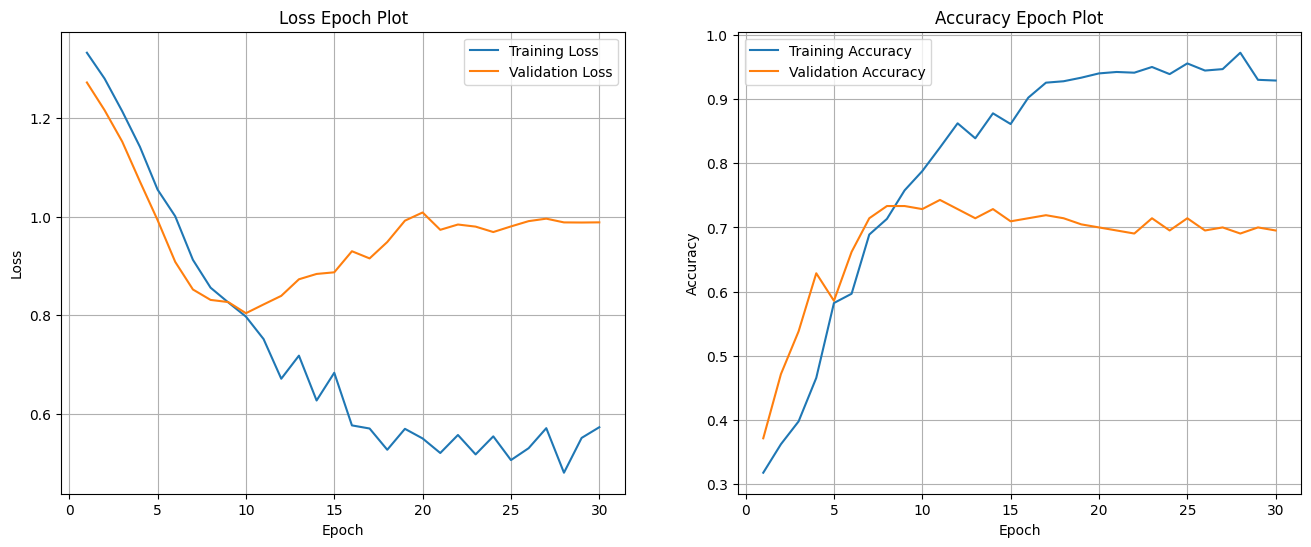

In [87]:
plot_loss_and_accuracy_epochs(
    metrics['train_losses'],
    metrics['val_losses'],
    metrics['train_accuracies'],
    metrics['val_accuracies'],
    list(range(1, num_epochs+1))
)